## Credit Card Customer Churning


By Lakshmi Varrier

Course SWENG 545 Data mining (Spring 2021)

The dataset used is obtained from kaggle dataset:
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

### Data Dictionary

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Import Libraries

In [1]:
#!pip install openpyxl

In [2]:
# First, start with all imports that will be used throughout the notebook (consolidated for simplicity)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pylab
import sys
import itertools
import openpyxl

# Import from sklearn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.model_selection import validation_curve, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics, svm, preprocessing, utils
from sklearn import datasets as ds
from openpyxl import load_workbook
from matplotlib.colors import LogNorm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# Ignore warnings (they are not errors)
import warnings
warnings.filterwarnings('ignore')

# We always want to see all columns
pd.set_option('display.max_columns', None)

In [3]:
#Load the whole dataset

bank_frame = pd.read_excel("bank_churners.xlsx")
                       
        # Return all DataFrames
bank_frame.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  710202783  Existing Customer            33      M                2   
1  717998058  Existing Customer            26      M                0   
2  779445108  Existing Customer            26      M                0   
3  779149683  Existing Customer            30      F                0   
4  788728608  Existing Customer            34      M                0   

  Education_Level Marital_Status Income_Category Card_Category  \
0        Graduate        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate         Single     $40K - $60K          Blue   
3        Graduate       Divorced         Unknown          Blue   
4     High School        Married     $40K - $60K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              13                         3                       3   
1              13                         6                       3   
2              13                         6                       1   
3              13                         5                       1   
4              13                         3                       3   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3        1963.0                 1721            242.0   
1                      2        2585.0                 2019            566.0   
2                      2        3290.0                 1616           1674.0   
3                      2        7772.0                 1890           5882.0   
4                      2        3870.0                 1394           2476.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 0.680             1378              37                0.762   
1                 0.525             2644              40                0.481   
2                 0.466             2781              54                0.350   
3                 0.754             2585              75                0.829   
4                 0.827             1588              36                0.714   

   Avg_Utilization_Ratio  \
0                  0.877   
1                  0.781   
2                  0.491   
3                  0.243   
4                  0.360   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000303                                                                                    
1                                           0.000154                                                                                    
2                                           0.000047                                                                                    
3                                           0.000047                                                                                    
4                                           0.000150                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99970                                                                                   
1                                            0.99985                                                                                   
2                                            0.99995                                                                                   
3                                            0.99995                                                                                   
4                                            0.99985

In [4]:
#Size of dataframe
bank_frame.shape

(10127, 23)

### Data Cleaning

In [5]:
#Remove unnecessary columns
bank_frame_new = bank_frame.drop(columns = ['CLIENTNUM',
                                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                                         ])
bank_frame_new.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            33      M                2        Graduate   
1  Existing Customer            26      M                0        Graduate   
2  Existing Customer            26      M                0        Graduate   
3  Existing Customer            30      F                0        Graduate   
4  Existing Customer            34      M                0     High School   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              13   
1         Single  Less than $40K          Blue              13   
2         Single     $40K - $60K          Blue              13   
3       Divorced         Unknown          Blue              13   
4        Married     $40K - $60K          Blue              13   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         3                       3                      3   
1                         6                       3                      2   
2                         6                       1                      2   
3                         5                       1                      2   
4                         3                       3                      2   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0        1963.0                 1721            242.0                 0.680   
1        2585.0                 2019            566.0                 0.525   
2        3290.0                 1616           1674.0                 0.466   
3        7772.0                 1890           5882.0                 0.754   
4        3870.0                 1394           2476.0                 0.827   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1378              37                0.762                  0.877  
1             2644              40                0.481                  0.781  
2             2781              54                0.350                  0.491  
3             2585              75                0.829                  0.243  
4             1588              36                0.714                  0.360

In [6]:
bank_frame_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
bank_frame_new.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

In [8]:
# Check for missing values

bank_frame_new.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
#Number of unique values in each column
bank_frame_new.nunique().sort_values(ascending=False)

Avg_Open_To_Buy             6813
Credit_Limit                6205
Total_Trans_Amt             5033
Total_Revolving_Bal         1974
Total_Amt_Chng_Q4_Q1        1158
Avg_Utilization_Ratio        964
Total_Ct_Chng_Q4_Q1          830
Total_Trans_Ct               126
Customer_Age                  45
Months_on_book                44
Education_Level                7
Contacts_Count_12_mon          7
Months_Inactive_12_mon         7
Dependent_count                6
Total_Relationship_Count       6
Income_Category                6
Marital_Status                 4
Card_Category                  4
Gender                         2
Attrition_Flag                 2
dtype: int64

In [10]:
#Check for duplicated records

bank_frame_new.duplicated().sum()

0

In [11]:
# drop all unneeded columns

bank_frame_new = bank_frame_new.drop(columns = ['Total_Amt_Chng_Q4_Q1',
                                            'Total_Ct_Chng_Q4_Q1',
                     #                        'Contacts_Count_12_mon',
                                             'Avg_Open_To_Buy',
                                             'Avg_Utilization_Ratio'])
bank_frame_new.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            33      M                2        Graduate   
1  Existing Customer            26      M                0        Graduate   
2  Existing Customer            26      M                0        Graduate   
3  Existing Customer            30      F                0        Graduate   
4  Existing Customer            34      M                0     High School   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              13   
1         Single  Less than $40K          Blue              13   
2         Single     $40K - $60K          Blue              13   
3       Divorced         Unknown          Blue              13   
4        Married     $40K - $60K          Blue              13   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         3                       3                      3   
1                         6                       3                      2   
2                         6                       1                      2   
3                         5                       1                      2   
4                         3                       3                      2   

   Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  
0        1963.0                 1721             1378              37  
1        2585.0                 2019             2644              40  
2        3290.0                 1616             2781              54  
3        7772.0                 1890             2585              75  
4        3870.0                 1394             1588              36

In [12]:
uniq_cols = ['Months_Inactive_12_mon','Education_Level','Income_Category',
            'Dependent_count','Total_Relationship_Count','Card_Category','Marital_Status','Gender','Attrition_Flag']

for col in uniq_cols:
    print(bank_frame_new[col].value_counts())
    print('-'*50)

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20

In [13]:
#dummiesdata = pd.get_dummies(bank_frame_new.Attrition_Flag)

#dummiesdata

#bank_frame_new = pd.concat([bank_frame_new, dummiesdata], axis=1).drop(['Attrition_Flag'], axis=1)



In [14]:
#bank_frame_new = bank_frame_new.rename(columns={'Attrited Customer': 'Attrited_Customer', 'Existing Customer': 'Existing_Customer'})

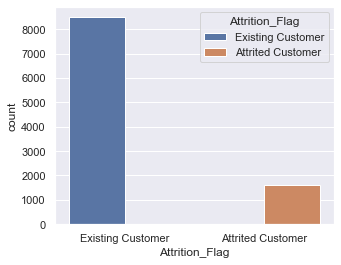

In [15]:
sns.set(rc={"figure.figsize":(5, 4)})
ax = sns.countplot(x= 'Attrition_Flag',data=bank_frame_new ,hue='Attrition_Flag')
#ax.legend(title='Attrited Customer', labels= ['No', 'Yes'])

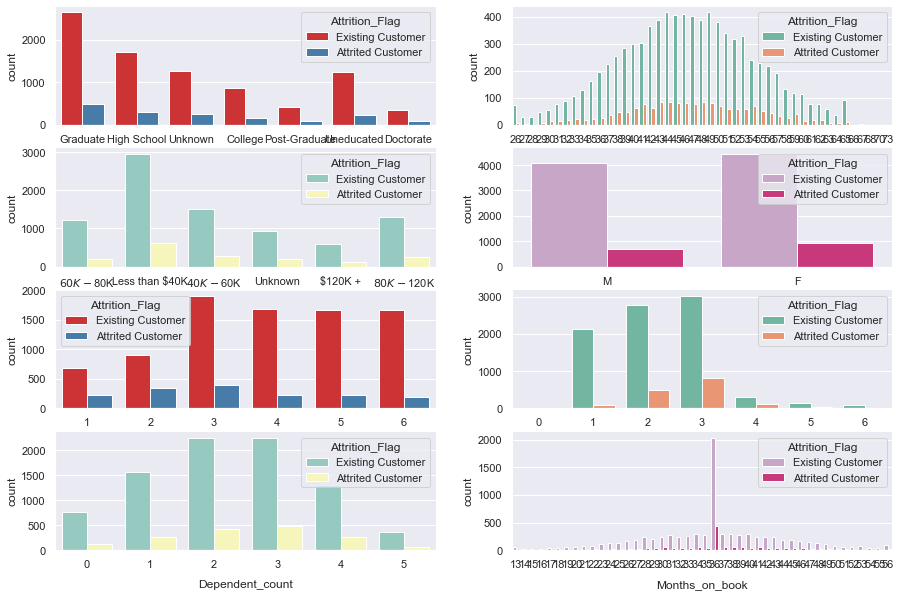

In [16]:
#analyze the relationship between categorical variables and the target variable
categorical_labels = [['Education_Level', 'Customer_Age'], ['Income_Category', 'Gender'],
                      ['Total_Relationship_Count','Months_Inactive_12_mon'],
                      ['Dependent_count','Months_on_book']
                     ]
colors = [['Set1', 'Set2'], ['Set3', 'PuRd'],['Set1', 'Set2'],['Set3', 'PuRd']]

fig, ax = plt.subplots(4, 2, figsize=(15, 10))
for i in range(4):
    for j in range(2):
        feature = categorical_labels[i][j]
        color = colors[i][j]
        ax1 = sns.countplot(x=feature, hue='Attrition_Flag', palette=color, data=bank_frame_new, ax=ax[i][j])
        ax1.set_xlabel(feature, labelpad=10)
        #ax1.set_ylim(0, 5000)
        #ax1.legend(title='Attrited Customer', labels= ['No', 'Yes'])
       
sns.despine()

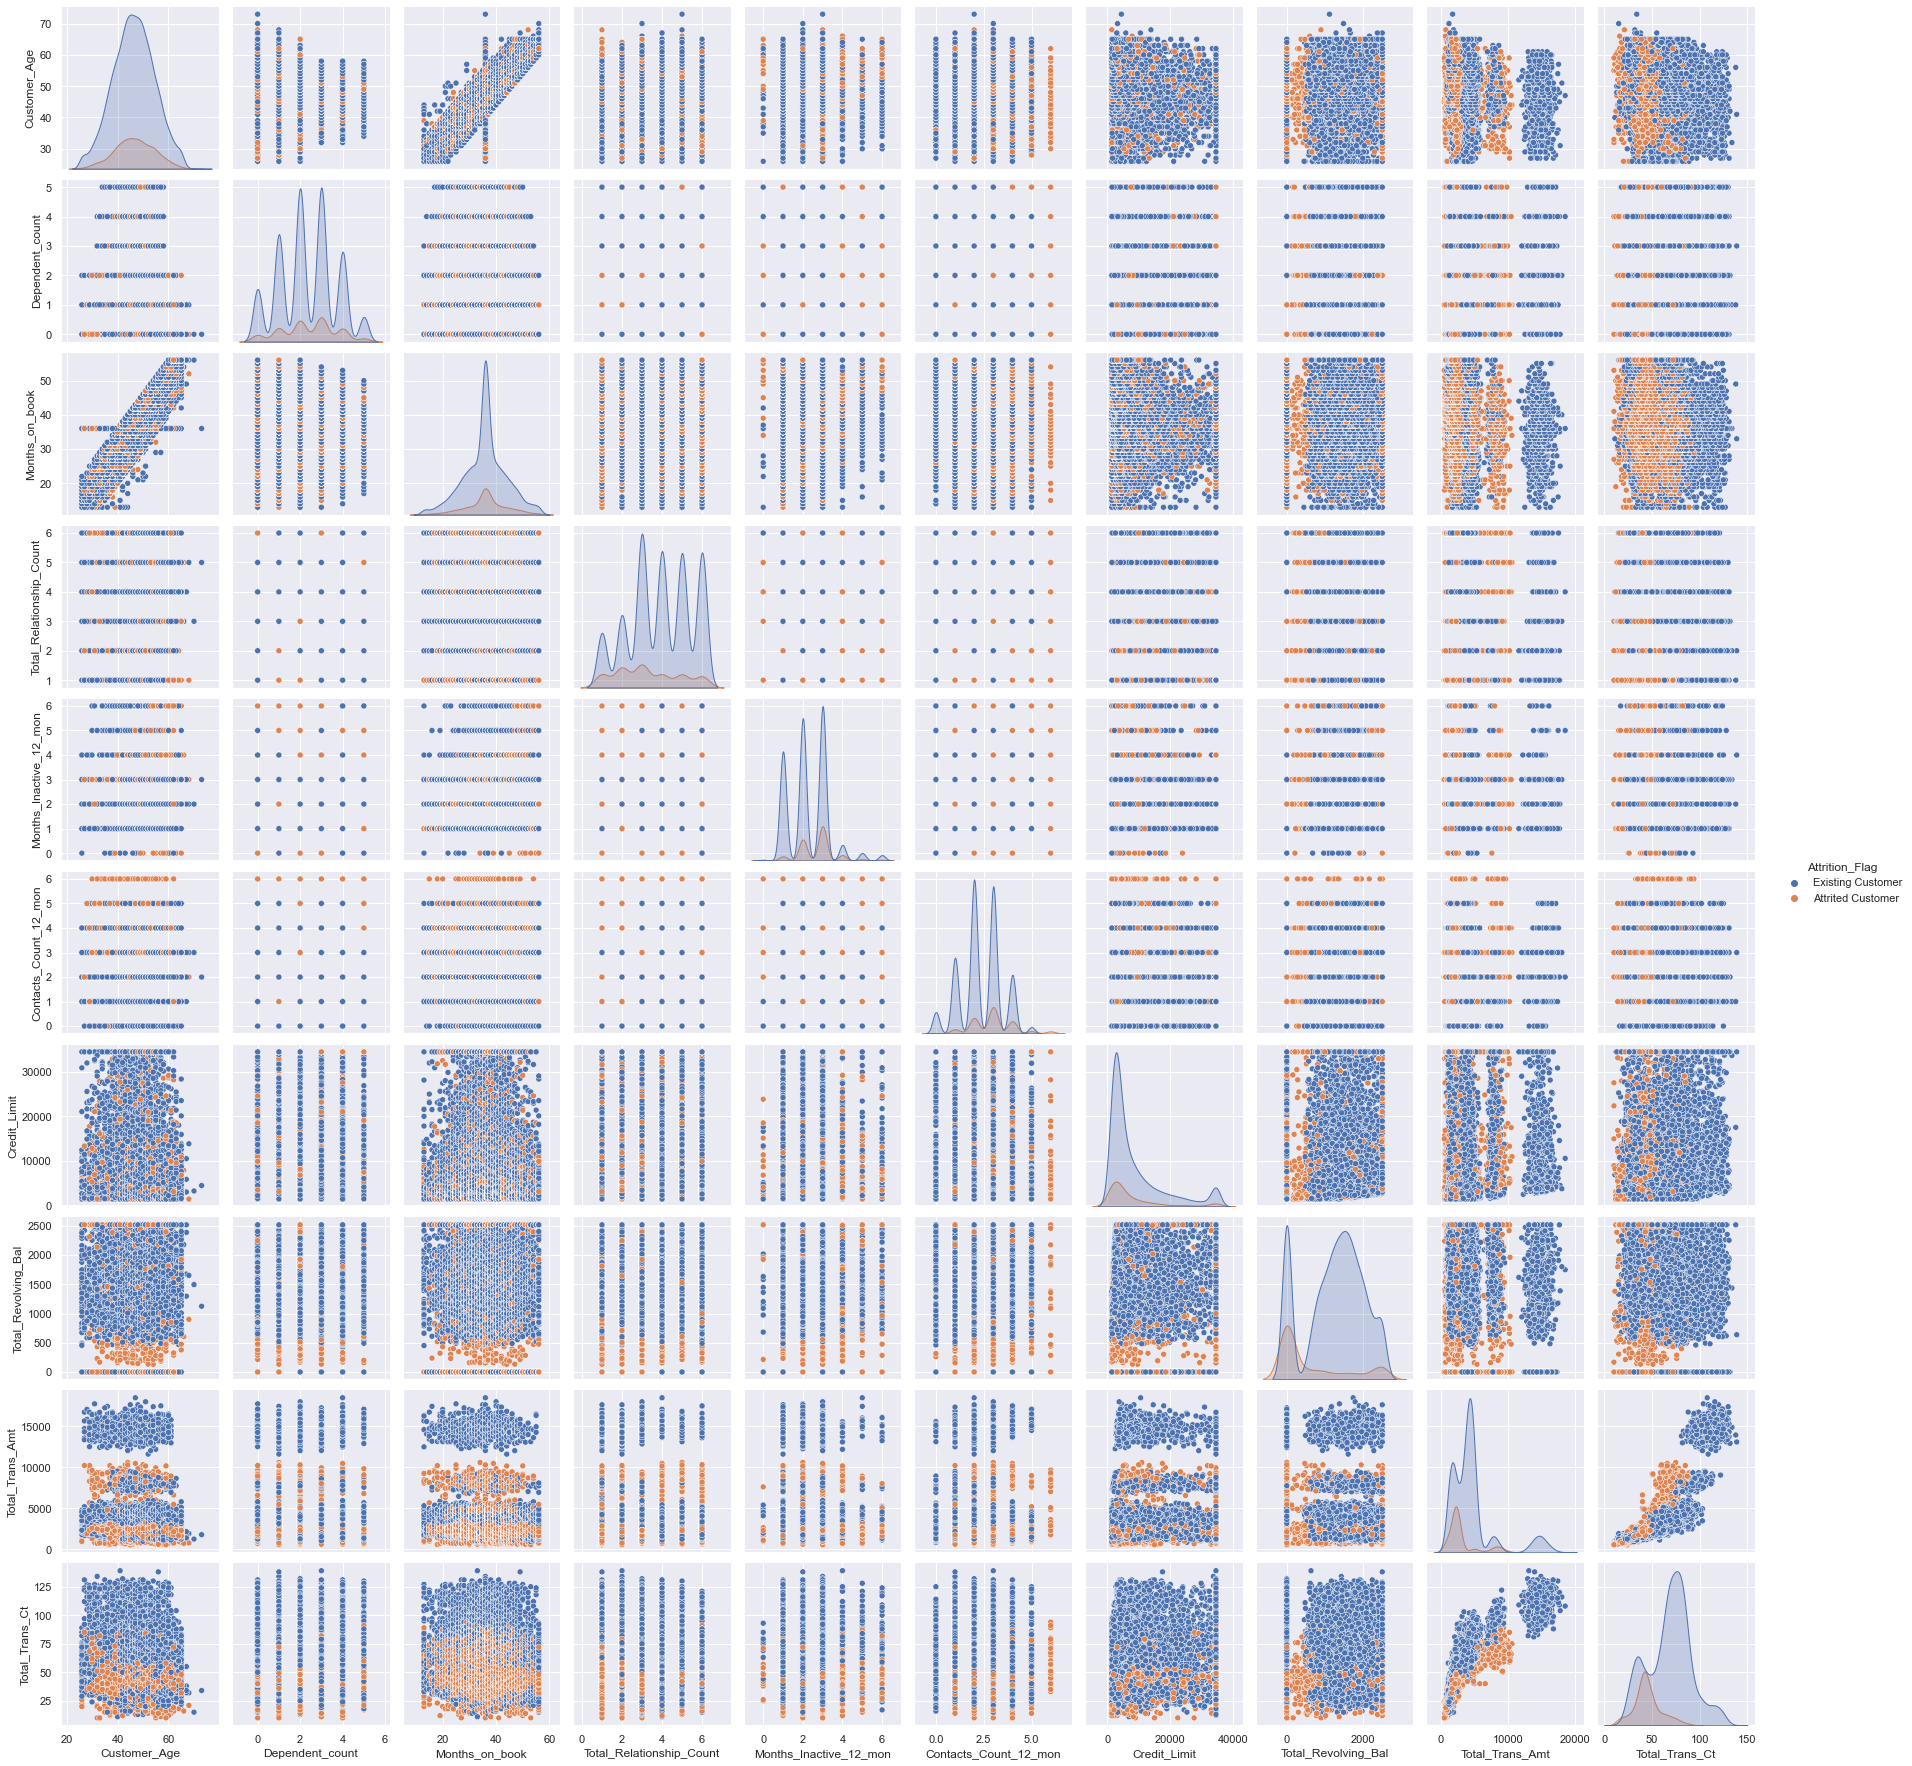

In [17]:
#Pairplot for the dataset
sns.pairplot(data=bank_frame_new, hue='Attrition_Flag');

From the above plots ,  we understand that Customer Age, Gender, Marital Status,Dependent Count,Months on book and Card category are not very important features in deciding the customer attrition.So, we remove these features from the dataset.

In [18]:
# drop all unneeded columns

bank_frame_new = bank_frame_new.drop(columns = ['Dependent_count','Customer_Age',
                                            'Gender','Education_Level',
                                             #'Months_on_book',
                                             'Marital_Status','Income_Category','Months_Inactive_12_mon',
                                             'Card_Category'])
bank_frame_new

Attrition_Flag  Months_on_book  Total_Relationship_Count  \
0      Existing Customer              13                         3   
1      Existing Customer              13                         6   
2      Existing Customer              13                         6   
3      Existing Customer              13                         5   
4      Existing Customer              13                         3   
...                  ...             ...                       ...   
10122  Existing Customer              56                         2   
10123  Existing Customer              56                         3   
10124  Existing Customer              56                         2   
10125  Existing Customer              56                         1   
10126  Attrited Customer              56                         1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3        1963.0                 1721   
1                          2        2585.0                 2019   
2                          2        3290.0                 1616   
3                          2        7772.0                 1890   
4                          2        3870.0                 1394   
...                      ...           ...                  ...   
10122                      2        7264.0                  851   
10123                      2        3421.0                 2266   
10124                      2       18224.0                 1383   
10125                      3        6103.0                 2517   
10126                      1        3109.0                    0   

       Total_Trans_Amt  Total_Trans_Ct  
0                 1378              37  
1                 2644              40  
2                 2781              54  
3                 2585              75  
4                 1588              36  
...                ...             ...  
10122             3527              69  
10123             6932              75  
10124             7728              93  
10125             8080              92  
10126             5470              72  

[10127 rows x 8 columns]

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
 

In [20]:
att_flag_encoded = label_encoder.fit_transform(bank_frame_new['Attrition_Flag'])
att_flag_df = pd.DataFrame(att_flag_encoded,columns = ["Att_flag_encoded"])
bank_frame_new = pd.concat([bank_frame_new, att_flag_df], axis=1).drop(['Attrition_Flag'], axis=1)

In [21]:
#education_lvl_encoded = label_encoder.fit_transform(bank_frame_new['Education_Level'])
#education_lvl_df = pd.DataFrame(education_lvl_encoded,columns=["Education_Level_Categ"])
#bank_frame_new = pd.concat([bank_frame_new, education_lvl_df], axis=1).drop(['Education_Level'], axis=1)


In [22]:
#income_category_encoded = label_encoder.fit_transform(bank_frame_new['Income_Category'])
#income_category_df = pd.DataFrame(income_category_encoded,columns=["Income_Categ"])
#bank_frame_new = pd.concat([bank_frame_new, income_category_df], axis=1).drop(['Income_Category'], axis=1)


In [23]:
bank_frame_new.head()

Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  \
0              13                         3                      3   
1              13                         6                      2   
2              13                         6                      2   
3              13                         5                      2   
4              13                         3                      2   

   Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  \
0        1963.0                 1721             1378              37   
1        2585.0                 2019             2644              40   
2        3290.0                 1616             2781              54   
3        7772.0                 1890             2585              75   
4        3870.0                 1394             1588              36   

   Att_flag_encoded  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

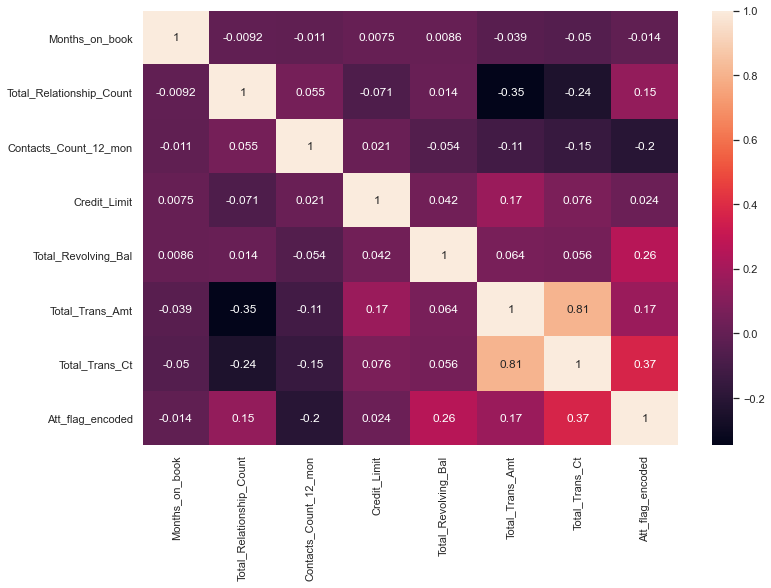

In [24]:
bank_frame_new_corr = bank_frame_new.corr()

sns.set(rc={"figure.figsize":(12,8)})
sns.heatmap(bank_frame_new_corr, annot=True)
plt.show()

### Clustering 

* Scaling data before clustering.

It is important to scale the data and make different features on the same scale before doing unsupervised learning techniques, since unsupervised learning algorithms find similarity between data points and group them in clusters based on distance measures and the distance measures are scale dependent.

In [25]:
bank_frame_new.columns

Index(['Months_on_book', 'Total_Relationship_Count', 'Contacts_Count_12_mon',
       'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Att_flag_encoded'],
      dtype='object')

In [69]:
bank_scaled_df = bank_frame_new.copy()
bank_scaled_df.drop(columns = ['Att_flag_encoded'],inplace=True)
bank_scaled_df.head()

Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  \
0              13                         3                      3   
1              13                         6                      2   
2              13                         6                      2   
3              13                         5                      2   
4              13                         3                      2   

   Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  \
0        1963.0                 1721             1378              37   
1        2585.0                 2019             2644              40   
2        3290.0                 1616             2781              54   
3        7772.0                 1890             2585              75   
4        3870.0                 1394             1588              36   

   K_means_segments  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [70]:
# Normalize the data

col_names = ['Months_on_book','Total_Relationship_Count','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']
features = bank_scaled_df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

bank_scaled_df[col_names] = features

In [71]:
bank_scaled_df

Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  \
0           -2.871068                 -0.522785               0.492404   
1           -2.871068                  1.407306              -0.411616   
2           -2.871068                  1.407306              -0.411616   
3           -2.871068                  0.763943              -0.411616   
4           -2.871068                 -0.522785              -0.411616   
...               ...                       ...                    ...   
10122        2.513340                 -1.166148              -0.411616   
10123        2.513340                 -0.522785              -0.411616   
10124        2.513340                 -1.166148              -0.411616   
10125        2.513340                 -1.809512               0.492404   
10126        2.513340                 -1.809512              -1.315636   

       Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  \
0         -0.733793             0.684935        -0.890821       -1.186920   
1         -0.665354             1.050603        -0.518135       -1.059105   
2         -0.587782             0.556092        -0.477805       -0.462635   
3         -0.094622             0.892311        -0.535504        0.432071   
4         -0.523964             0.283682        -0.829002       -1.229525   
...             ...                  ...              ...             ...   
10122     -0.150518            -0.382619        -0.258197        0.176440   
10123     -0.573368             1.353690         0.744169        0.432071   
10124      1.055425             0.270184         0.978496        1.198961   
10125     -0.278264             1.661686         1.082118        1.156356   
10126     -0.607697            -1.426858         0.313784        0.304255   

       K_means_segments  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
10122                 1  
10123                 1  
10124                 1  
10125                 1  
10126                 1  

[10127 rows x 8 columns]

### PCA

In [72]:
#Dimensionality Reduction

pca = PCA(n_components=5)
pca_bank_new = pca.fit_transform(bank_scaled_df)


In [73]:
pca_bank_new.shape

(10127, 5)

In [74]:
#create a dataframe for pca results
pca_data_df = pd.DataFrame(data = pca_bank_new, columns = ['component_1', 'component_2','component_3','component_4','component_5'])
pca_data_df.head()

component_1  component_2  component_3  component_4  component_5
0    -1.123446     2.829023    -0.447341     0.367391    -0.539033
1    -1.317622     2.855361    -1.694653     0.761022     0.020632
2    -0.951087     2.919743    -1.406481     0.429747     0.174666
3    -0.085936     2.819532    -1.288760     0.790416     0.166737
4    -0.947668     2.748132    -0.735315     0.016766     0.342088

In [75]:
print('Explained variance per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variance per principal component: [0.28589359 0.15772048 0.14371541 0.140868   0.12296079]


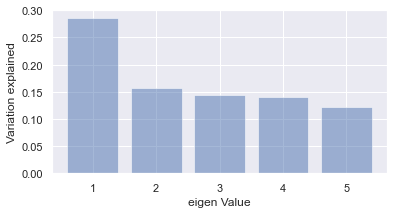

In [76]:
#Visualize the variance explained
plt.figure(figsize=(6,3))
plt.bar(list(range(1,6)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

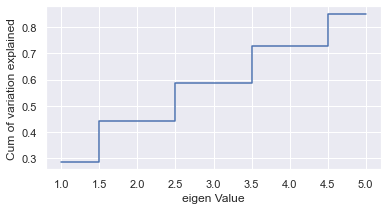

In [77]:
#cumulative variance explained plot
plt.figure(figsize=(6,3))
plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

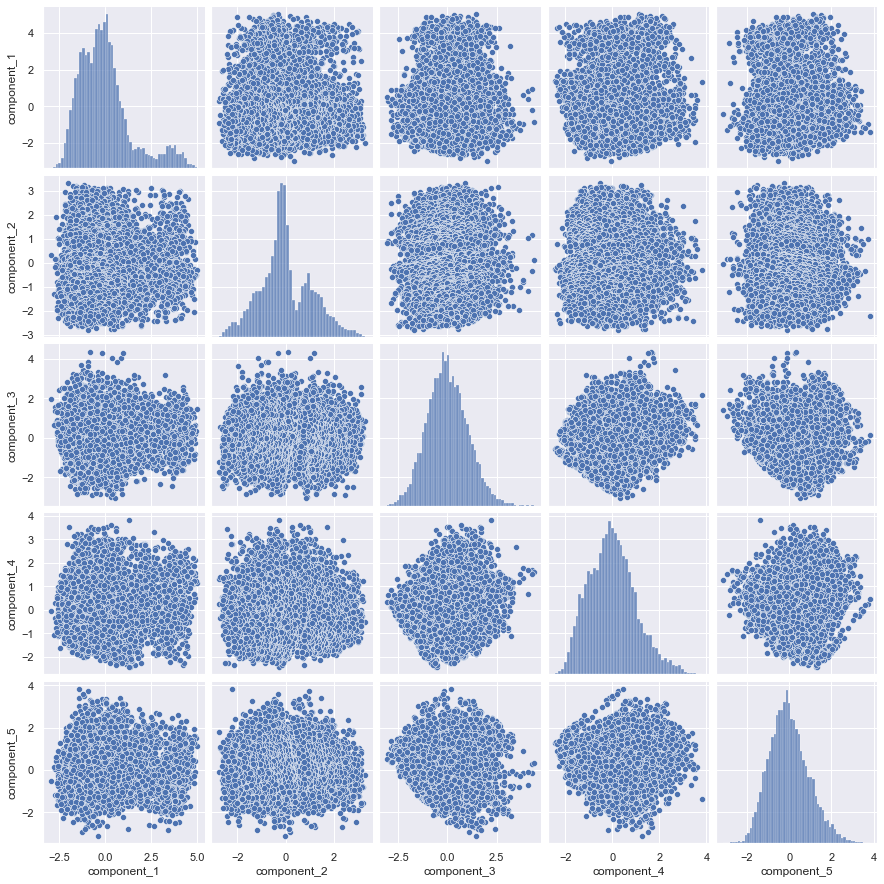

In [78]:
#pairplot between pca component 1 and component 2
sns.pairplot(pca_data_df);

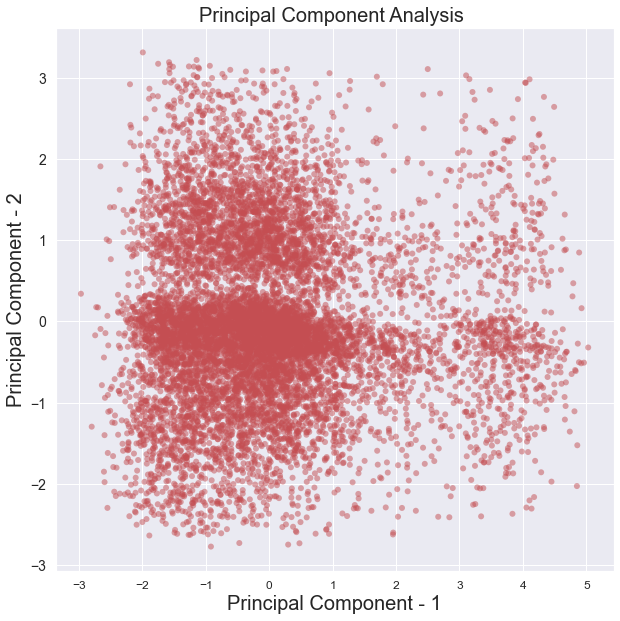

In [79]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis ",fontsize=20)
plt.scatter(pca_bank_new[:, 0], pca_bank_new[:, 1], c= "r",
            edgecolor='none', alpha=0.5)

### K-Means Clustering

In [80]:
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++').fit(bank_scaled_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[73052.35933642738,
 59587.17377012742,
 52644.43796981532,
 47433.76822772487,
 43004.651709458885,
 39684.0761900465,
 37227.2161299902,
 35553.66386168153,
 34085.66583195497]

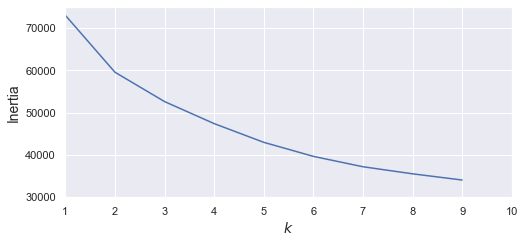

In [81]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10, 30000, 75000])
#plt.annotate('Elbow',
#             xy=(4, inertias[3]),
#             xytext=(0.55, 0.55),
#             textcoords='figure fraction',
#             fontsize=16,
#             arrowprops=dict(facecolor='black', shrink=0.1)
#            )
plt.show()

In [47]:
#K-Means Clustering

from sklearn.metrics import silhouette_score

##### Checking Silhouette Score

* Silhouette score for a set of data points is used to measure how dense and well-separated the clusters are
* Silhouette score takes into consideration the intra-cluster distance between the sample and other data points within the same cluster and inter-cluster distance between the sample and the next nearest cluster
* The silhouette score falls within the range -1 to +1
* The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect

In [82]:
sil_score = []
cluster_list = list(range(2,10))
for n_cluster in cluster_list:
    m_cluster = KMeans(n_clusters=n_cluster)
    predict = m_cluster.fit_predict((bank_scaled_df))    
    score = silhouette_score(bank_scaled_df, predict)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_cluster, score))

For n_clusters = 2, silhouette score is 0.290922670876258)
For n_clusters = 3, silhouette score is 0.16114491090880464)
For n_clusters = 4, silhouette score is 0.17193519569527643)
For n_clusters = 5, silhouette score is 0.16568500085947266)
For n_clusters = 6, silhouette score is 0.16060263521649182)
For n_clusters = 7, silhouette score is 0.159453466018061)
For n_clusters = 8, silhouette score is 0.1567523183560741)
For n_clusters = 9, silhouette score is 0.15509862542449296)


In [83]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 7)
y_kmeans = kmeans.fit_predict(bank_scaled_df)
score = silhouette_score(bank_scaled_df, y_kmeans)
score

0.290922670876258

In [87]:
kmeans.cluster_centers_

array([[ 0.01078718,  0.17934819,  0.04251795, -0.10938949, -0.04381583,
        -0.33240358, -0.23500447,  0.69169054],
       [-0.06713136, -1.11612908, -0.26459993,  0.68075844,  0.27267699,
         2.06863142,  1.46249214,  0.68473609]])

In [88]:
#Adding cluster labels to the original dataset
bank_frame_new['K_means_segments'] = kmeans.labels_
bank_frame_new

Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  \
0                  13                         3                      3   
1                  13                         6                      2   
2                  13                         6                      2   
3                  13                         5                      2   
4                  13                         3                      2   
...               ...                       ...                    ...   
10122              56                         2                      2   
10123              56                         3                      2   
10124              56                         2                      2   
10125              56                         1                      3   
10126              56                         1                      1   

       Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  \
0            1963.0                 1721             1378              37   
1            2585.0                 2019             2644              40   
2            3290.0                 1616             2781              54   
3            7772.0                 1890             2585              75   
4            3870.0                 1394             1588              36   
...             ...                  ...              ...             ...   
10122        7264.0                  851             3527              69   
10123        3421.0                 2266             6932              75   
10124       18224.0                 1383             7728              93   
10125        6103.0                 2517             8080              92   
10126        3109.0                    0             5470              72   

       Att_flag_encoded  K_means_segments  
0                     1                 0  
1                     1                 0  
2                     1                 0  
3                     1                 0  
4                     1                 0  
...                 ...               ...  
10122                 1                 0  
10123                 1                 0  
10124                 1                 1  
10125                 1                 1  
10126                 0                 0  

[10127 rows x 9 columns]

In [89]:
#Adding cluster labels to the scaled dataset
bank_scaled_df['K_means_segments'] = kmeans.labels_


In [90]:
bank_scaled_df

Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  \
0           -2.871068                 -0.522785               0.492404   
1           -2.871068                  1.407306              -0.411616   
2           -2.871068                  1.407306              -0.411616   
3           -2.871068                  0.763943              -0.411616   
4           -2.871068                 -0.522785              -0.411616   
...               ...                       ...                    ...   
10122        2.513340                 -1.166148              -0.411616   
10123        2.513340                 -0.522785              -0.411616   
10124        2.513340                 -1.166148              -0.411616   
10125        2.513340                 -1.809512               0.492404   
10126        2.513340                 -1.809512              -1.315636   

       Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  \
0         -0.733793             0.684935        -0.890821       -1.186920   
1         -0.665354             1.050603        -0.518135       -1.059105   
2         -0.587782             0.556092        -0.477805       -0.462635   
3         -0.094622             0.892311        -0.535504        0.432071   
4         -0.523964             0.283682        -0.829002       -1.229525   
...             ...                  ...              ...             ...   
10122     -0.150518            -0.382619        -0.258197        0.176440   
10123     -0.573368             1.353690         0.744169        0.432071   
10124      1.055425             0.270184         0.978496        1.198961   
10125     -0.278264             1.661686         1.082118        1.156356   
10126     -0.607697            -1.426858         0.313784        0.304255   

       K_means_segments  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
10122                 0  
10123                 0  
10124                 1  
10125                 1  
10126                 0  

[10127 rows x 8 columns]

In [91]:
#Cluster profile based on scaled dataset
cluster_profile = bank_frame_new.groupby('K_means_segments').mean()

In [92]:
cluster_profile['count_in_each_segment_kmeans'] = bank_frame_new.groupby('K_means_segments')['Att_flag_encoded'].count().values

In [93]:
#Cluster Profile

# To display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

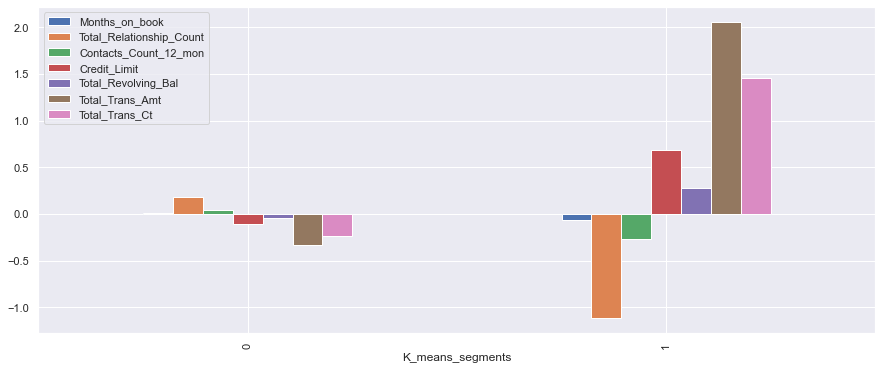

In [94]:
bank_scaled_df.groupby('K_means_segments').mean().plot.bar(figsize=(15,6));

### Conclusion

From the above plots, we can conclude that
* 1. Attrited customers have very high credit limit, total transaction amount and transaction count with in the last 12 months compared to existing customers.
* 2. Also, the relationship count, ie,number of card/accounts with the bank is comparetively very low for attrited customers.

Hence, most of the attrited customers do large number of transactions within first 12 months 

### K-Means clustering with PCA

In [96]:
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++').fit(pca_bank_new)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[62179.11892760644,
 48898.96627482108,
 42094.15353067075,
 37024.209982978726,
 32524.161907535614,
 29342.61680206055,
 27613.17536134689,
 26143.483297867977,
 24886.22537683527]

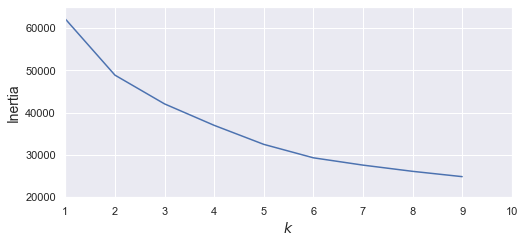

In [97]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10, 20000, 65000])
#plt.annotate('Elbow',
#             xy=(4, inertias[3]),
#             xytext=(0.55, 0.55),
#             textcoords='figure fraction',
#             fontsize=16,
#             arrowprops=dict(facecolor='black', shrink=0.1)
#            )
plt.show()

In [98]:
sil_score = []
cluster_list = list(range(2,10))
for n_cluster in cluster_list:
    m_cluster = KMeans(n_clusters=n_cluster)
    predict = m_cluster.fit_predict((pca_bank_new))    
    score = silhouette_score(pca_bank_new, predict)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_cluster, score))

For n_clusters = 2, silhouette score is 0.31509095999034653)
For n_clusters = 3, silhouette score is 0.1842019695331194)
For n_clusters = 4, silhouette score is 0.20051630853162772)
For n_clusters = 5, silhouette score is 0.20259539771659507)
For n_clusters = 6, silhouette score is 0.19865077519003901)
For n_clusters = 7, silhouette score is 0.18610736796056465)
For n_clusters = 8, silhouette score is 0.18050593270908757)
For n_clusters = 9, silhouette score is 0.1864824304131743)


In [99]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 7)
y_kmeans = kmeans.fit_predict(pca_bank_new)
score = silhouette_score(pca_bank_new, y_kmeans)
score

0.31525634176438944

In [100]:
kmeans.cluster_centers_

array([[ 2.74659454, -0.09927731,  0.24297199,  0.18504204, -0.05019731],
       [-0.47084478,  0.01701897, -0.04165234, -0.03172149,  0.00860525]])

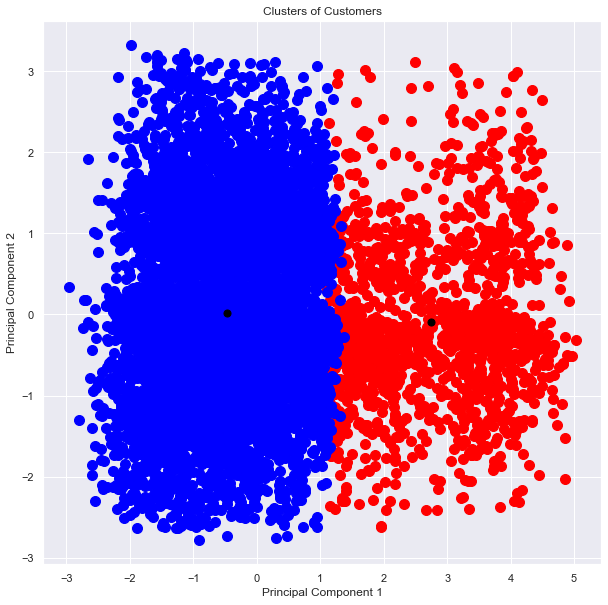

In [103]:
plt.figure(figsize=(10,10))
plt.scatter(pca_bank_new[y_kmeans == 0, 0], pca_bank_new[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_bank_new[y_kmeans == 1, 0], pca_bank_new[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(pca_bank_new[y_kmeans == 2, 0], pca_bank_new[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(pca_bank_new[y_kmeans == 3, 0], pca_bank_new[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()